1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Probability of having 15 hurricanes in a year: 0.0013726297097147906

Calculated Z-score: 3.4661629670697414


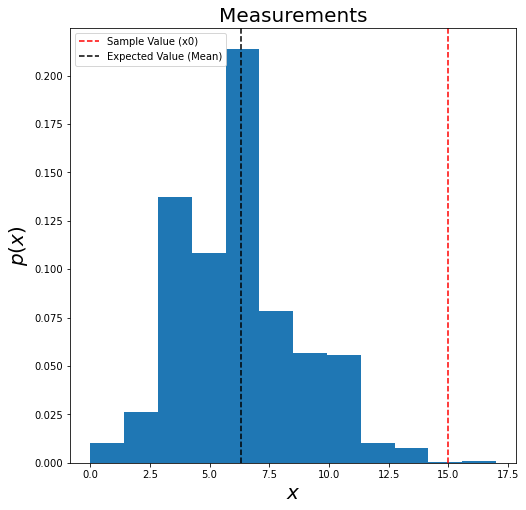

In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats

np.random.seed(2345)

x0 = 15
mu = 6.3
z = 3

# For Poisson Distribution Variance is same as Mean, and std is sqrt(variance)
sigma = sqrt(mu)

# Calculating the probability using the PMF for Poisson Distributions
prob = stats.poisson.pmf(k=15,mu=mu)

print('Probability of having 15 hurricanes in a year:',prob)

#Calculate z from  this sigma
calculated_z = abs(x0-mu)/sigma
print('\nCalculated Z-score:',calculated_z)

y = stats.poisson.rvs(mu,loc=0,size = 10000)

fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.hist(y, bins = 12, density = True)
ax.axvline(x0, linestyle='--', color='red', label = 'Sample Value (x0)')
ax.axvline(mu, linestyle='--', color='black', label = 'Expected Value (Mean)')
ax.set_title("Measurements", fontsize = 20)
ax.set_ylabel("$p(x)$", fontsize = 20)
ax.set_xlabel("$x$", fontsize = 20)
ax.legend(loc = 'upper left')
plt.show()

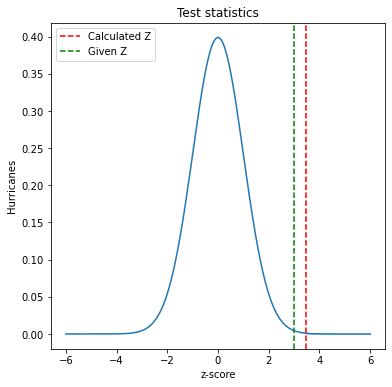

In [2]:
# plot the test statistics and its pdf
xs = np.linspace(-6, +6, 1000) 
ts = stats.norm.pdf(xs)

plt.figure(figsize=(6,6))
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=xs > calculated_z, color='lightblue')
plt.axvline(calculated_z, linestyle='--', color='red', label = 'Calculated Z')
plt.axvline(z, linestyle='--', color='green', label = 'Given Z')
plt.title("Test statistics")
plt.ylabel("Hurricanes")
plt.xlabel("z-score")
plt.legend()
plt.show()

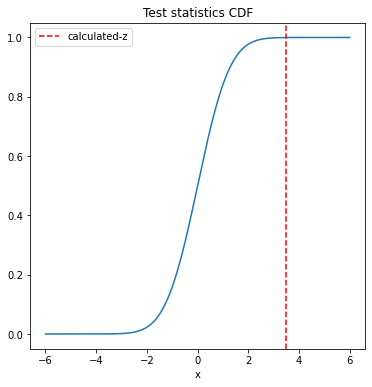


The significance level alpha calculated using the specified z-score of 3 is: 0.0013498980316301035

The significance level (p-value) is: 0.00026397158691493505

As the calculated p-value (0.026397 percent) is less than alpha (0.134990 percent) we reject the null hypothesis.

Thus the 


In [3]:
# plot the Gaussian Cumulative Distribution of the Test Statistic
cs = stats.norm.cdf(xs)
plt.figure(figsize=(6,6))
plt.plot(xs, cs)
plt.axvline(calculated_z, linestyle='--', color='red', label = 'calculated-z')
plt.title("Test statistics CDF")
plt.legend()
plt.xlabel("x")
plt.show()

# calculate the p-value as the right tail
alpha = (1. - stats.norm.cdf(z))  #Calculated from the given z-score
pvalue = (1. - stats.norm.cdf(calculated_z))

print('\nThe significance level alpha calculated using the specified z-score of 3 is:', alpha)
print('\nThe significance level (p-value) is:', pvalue)
print('\nAs the calculated p-value (%f percent) is less than alpha (%f percent) we reject the null hypothesis.' % (pvalue * 100, alpha * 100))
print('\nThus the ')

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [4]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = 10

pre_mean = np.mean(pre)
post_mean = np.mean(post)

var1 = np.sum([(x - pre_mean)**2 for x in pre])/(n-1)
var2 = np.sum([(x - post_mean)**2 for x in post])/(n-1)

sigma = sqrt((var1 + var2)/2)

#Test statistic calculation

T = (pre_mean - post_mean)/(sigma*sqrt(2/n))

print('\nTest Statistic:',T)

print('\nMean of systolic blood pressure pre-exposure x1: %f' % pre_mean)
print('Mean of systolic blood pressure post-exposure x2: %f\n' % post_mean)


Test Statistic: -3.786997938137629

Mean of systolic blood pressure pre-exposure x1: 116.700000
Mean of systolic blood pressure post-exposure x2: 135.400000



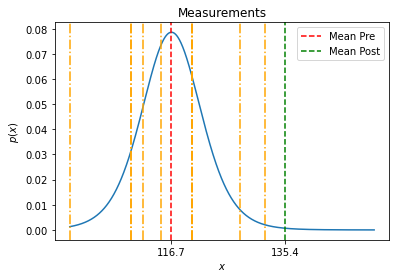

In [5]:
w = pre_mean - post_mean

x = np.linspace(100, 150, 1000)
y = stats.t.pdf(x,loc=pre_mean,scale=sigma*sqrt(2/n), df=n-1)
plt.plot(x, y)
plt.axvline(pre_mean, linestyle='--', color='red',label = 'Mean Pre')
for l in pre:
    plt.axvline(l, linestyle='-.', color='orange')
plt.axvline(post_mean, linestyle='--', color='green', label = 'Mean Post')
plt.xticks([pre_mean, post_mean])
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend()
plt.show()

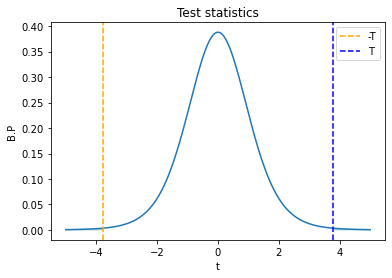

In [6]:
# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange', label = '-T')
plt.axvline(-T, linestyle='--', color='blue', label = 'T')
plt.title("Test statistics")
plt.ylabel("B.P")
plt.xlabel("t")
plt.legend()
plt.show()

In [7]:
# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print('\nSince the p-value is less than alpha = 0.05, the change in blood pressure is not statistically significant.')

p-value = 0.004302464132864604

Since the p-value is less than alpha = 0.05, the change in blood pressure is not statistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

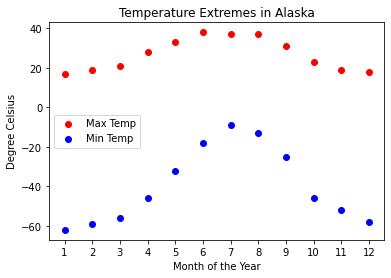

In [8]:
from scipy import optimize

max_temp = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_temp = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

months = np.linspace(1,12,12)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.scatter(months,max_temp, label = 'Max Temp',c='r')
ax.scatter(months,min_temp, label = 'Min Temp',c='b')
ax.set_title('Temperature Extremes in Alaska')
ax.set_xlabel('Month of the Year')
ax.set_ylabel('Degree Celsius')
ax.xaxis.set_ticks(np.arange(1,13,1))
ax.legend(loc='center left')
plt.show()

15.779351946525068
-61.320937050991844


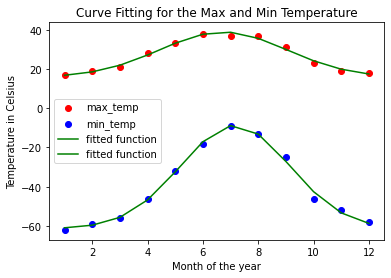

In [20]:
def gaussian(x, A, x0, sigma,offset):
    return offset + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

popt, pcov = optimize.curve_fit(gaussian, months, max_temp)
popt2, pcov2 = optimize.curve_fit(gaussian, months, min_temp)

print(popt[-1])
print(popt2[-1])

plt.scatter(months, max_temp, color='red' ,label='max_temp')
plt.scatter(months, min_temp, color='blue' ,label='min_temp')
plt.plot(months, gaussian(months, *popt), color='green', label='fitted function')
plt.plot(months, gaussian(months, *popt2), color='green', label='fitted function')
plt.xlabel('Month of the year')
plt.ylabel('Temperature in Celsius')
plt.title('Curve Fitting for the Max and Min Temperature')
plt.legend(loc='best')
plt.show()

In [23]:
# Is the time offset for min and max temperatures the same within the fit accuracy?

opt_max, cov_max = optimize.curve_fit(gaussian, range(12), max_temp, p0=[20,6,1,40])
opt_min, cov_min = optimize.curve_fit(gaussian, range(12), min_temp, p0=[20,6,1,40])

print('Curve fitting for Tmax')
print("Offset = %.2f +- %.2f" % (opt_max[-1], np.sqrt(cov_max[-1,-1])))
print("Time Offset = %.2f +- %.2f" % (opt_max[1], np.sqrt(cov_max[1,1])))
print('Curve fitting for Tmin')
print("Offset = %.2f +- %.2f" % (opt_min[-1], np.sqrt(cov_min[-1,-1])))
print("Time Offset = %.2f +- %.2f" % (opt_min[0], np.sqrt(cov_min[0,0])))

Curve fitting for Tmax
Offset = 15.78 +- 1.18
Time Offset = 5.74 +- 0.08
Curve fitting for Tmin
Offset = -61.32 +- 1.19
Time Offset = 52.65 +- 1.40


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [34]:
# !wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

import pickle

data= pd.read_pickle("data/residuals_261.pkl")
df = pd.DataFrame(data.item())

df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


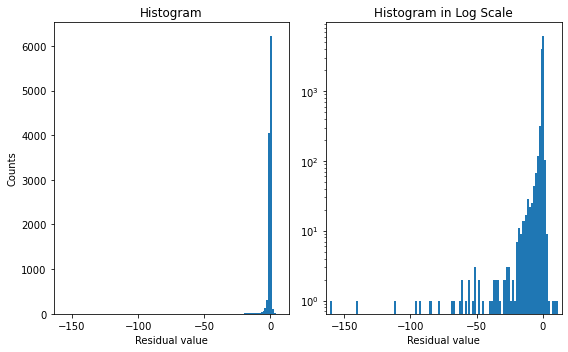

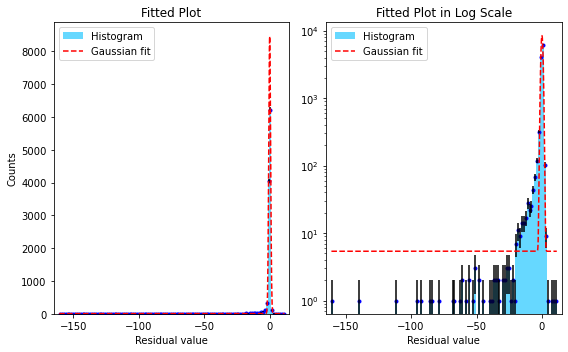

Chi Square Value(chi2): 7235.22921458196
p-value: 0.0
The p-value is less than alpha = 0.05, therefore the fit is unsatisfactory.


In [43]:
#histogram plot of the residuals
n_bins = 120
x = df['residuals']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
ax[0].hist(x, bins=n_bins)
ax[0].set_title('Histogram')
ax[0].set_xlabel('Residual value')
ax[0].set_ylabel('Counts')
ax[0].set_xlim(df['residuals'].min()-3,df['residuals'].max()+3)
ax[1].hist(x, bins=n_bins)
ax[1].set_title('Histogram in Log Scale')
ax[1].set_xlabel('Residual value')
ax[1].set_xlim(df['residuals'].min()-3,df['residuals'].max()+3)
ax[1].set_yscale('log')
plt.tight_layout()
plt.show()

#fit function definition
def gaus(x, baseline, constant, mu, sigma):
    return baseline + constant * stats.norm.pdf(x, mu, sigma)

#gaussian fit
y,binEdges = np.histogram(x,bins=n_bins)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
sigma_y = np.sqrt(y) #Poisson uncertainty
popt, pcov = optimize.curve_fit(gaus, bincenters, y, p0=np.asarray([5,1,-1,1]))



#histogram plot fit
x_range = np.linspace(df['residuals'].min(),df['residuals'].max(),1000) 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
ax[0].hist(x, bins=n_bins, alpha=0.6, label='Histogram', color='deepskyblue')
ax[0].scatter(bincenters,y,marker='.',color='blue')
ax[0].bar(bincenters, y, width=0, yerr=sigma_y)
ax[0].plot(x_range, gaus(x_range,*popt), c='red', linestyle='dashed' ,label='Gaussian fit',)
ax[0].set_xlabel('Residual value')
ax[0].set_ylabel('Counts')
ax[0].set_title('Fitted Plot')
ax[0].set_xlim([-165,15])
ax[0].legend(loc='best')

ax[1].hist(x, bins=n_bins, alpha=0.6, label='Histogram', color='deepskyblue')
ax[1].scatter(bincenters,y,marker='.',color='blue')
ax[1].bar(bincenters, y, width=0, yerr=sigma_y)
ax[1].plot(x_range, gaus(x_range,*popt), c='red', linestyle='dashed' ,label='Gaussian fit',)
ax[1].set_xlabel('Residual value')
ax[1].set_title('Fitted Plot in Log Scale')
ax[1].set_xlim([-165,15])
ax[1].set_yscale('log')
ax[1].legend(loc='best')
plt.tight_layout()
plt.show()

#mask to remove zeros
y_mask = np.where(y>0)
y_filtered = y[y_mask]
sigma_y_filtered = sigma_y[y_mask]
bincenters_filtered = bincenters[y_mask]

#chi square test
ndof = n_bins - 1
chi2 = np.sum(((y_filtered - gaus(bincenters_filtered,*popt))**2) / sigma_y_filtered)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print('Chi Square Value(chi2):', chi2)
print("p-value:", pvalue)
print("The p-value is less than alpha = 0.05, therefore the fit is unsatisfactory.")

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [13]:
# !wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

In [14]:
data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')

df = pd.DataFrame(data, columns= ['Time', 'Temperature'])

df1 = df.loc[df['Time'].between(2008, 2012, inclusive='both')].copy()
df1

,Time,Temperature
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444
...,...,...
6204,2011.98836,3.44444
6205,2011.99110,1.27778
6206,2011.99384,2.88889
6207,2011.99658,1.83333



Parameters a,b,c from the fit_function():
a = -9.9881
b = 12.3330
c = 9.3841 


The `b` paramter is the phase of the cosine function.
In our case, since the function is used to fit the temperature over a period of years,t being the time in years.
`b` determines the time of year when the temperature is minimum or maximum.

Average temperature from the data: 9.384097734976043 C˚

Average temperature from the model: 9.38577601262336 C˚
Typical cold day from the model: -0.6039969970554626 C˚
Typical hot day from the model: 19.372213977755273 C˚


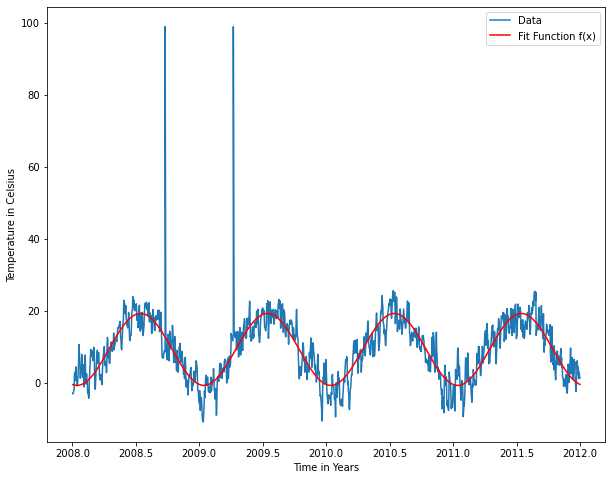

In [15]:
def fit_function(time,a,b,c):
    return a*np.cos(2*np.pi*time + b) + c

time = df1['Time'].to_numpy()
temp = df1['Temperature'].to_numpy()

param, cov = optimize.curve_fit(fit_function, time, temp)

a,b,c = param #Best Fit Parameters

# Print of the best-fit parameters
print('\nParameters a,b,c from the fit_function():')
print("a = %.4f" % a)
print("b = %.4f" % b)
print("c = %.4f" % c,'\n')

print('\nThe `b` paramter is the phase of the cosine function.')
print('In our case, since the function is used to fit the temperature over a period of years,t being the time in years.')
print('`b` determines the time of year when the temperature is minimum or maximum.')

print('\nAverage temperature from the data:', np.mean(temp),'C˚')

t_range = np.linspace(time.min(),time.max(),len(time)) 
temp_from_fit_fx = [fit_function(t,a,b,c) for t in t_range]

print('\nAverage temperature from the model:', np.mean(temp_from_fit_fx),'C˚')
print('Typical cold day from the model:', np.min(temp_from_fit_fx),'C˚')
print('Typical hot day from the model:', np.max(temp_from_fit_fx),'C˚')

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8))

ax1.plot(time, temp, label = 'Data')
ax1.plot(time, fit_function(time,a,b,c), color = 'red', label = 'Fit Function f(x)')
ax1.set_xlabel('Time in Years')
ax1.set_ylabel('Temperature in Celsius')
ax1.legend()
plt.show()


Parameters a,b,c from the fit_function_gx():
a = -9.9822
b = 1.0014
c = -5.9032
d = 9.3981 

Average temperature from the data: 9.384097734976043 C˚

Average temperature from the model: 9.385759113064118 C˚
Typical cold day from the model: -0.5840580146929462 C˚
Typical hot day from the model: 19.380305354896663 C˚


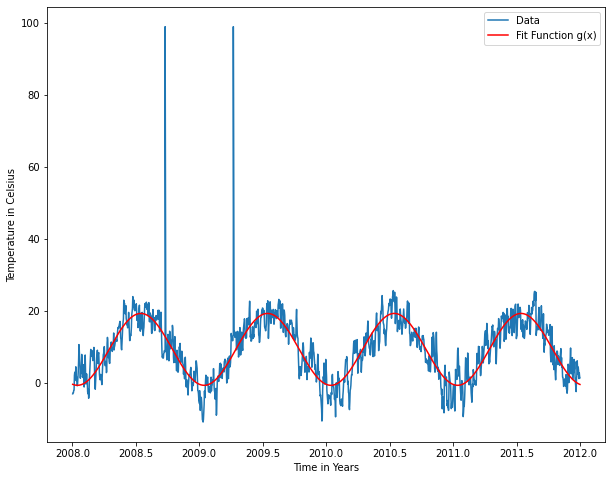

In [16]:
def fit_function_gx(time,a,b,c,d):
    return a*np.cos(2*np.pi*time*b + c) + d

param, cov = optimize.curve_fit(fit_function_gx, time, temp)

a,b,c,d = param #Best Fit Parameters

# Print of the best-fit parameters
print('\nParameters a,b,c from the fit_function_gx():')
print("a = %.4f" % a)
print("b = %.4f" % b)
print("c = %.4f" % c)
print("d = %.4f" % d,'\n')


print('Average temperature from the data:', np.mean(temp),'C˚')

t_range = np.linspace(time.min(),time.max(),len(time)) 
temp_from_fit_gx = [fit_function_gx(t,a,b,c,d) for t in t_range]

print('\nAverage temperature from the model:', np.mean(temp_from_fit_gx),'C˚')
print('Typical cold day from the model:', np.min(temp_from_fit_gx),'C˚')
print('Typical hot day from the model:', np.max(temp_from_fit_gx),'C˚')

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (10,8))

ax1.plot(time, temp, label = 'Data')
ax1.plot(time, fit_function_gx(time,a,b,c,d), color = 'red', label = 'Fit Function g(x)')
ax1.set_xlabel('Time in Years')
ax1.set_ylabel('Temperature in Celsius')
ax1.legend()
plt.show()

In [17]:
# RSS
def RSS(temp, temp_from_model):
    return np.sum((temp-temp_from_model)**2)

rss_fx = RSS(temp,temp_from_fit_fx)
rss_gx = RSS(temp,temp_from_fit_gx)

print('\nRSS for fit function f(x):',rss_fx)
print('\nRSS for fit function g(x):',rss_gx)


RSS for fit function f(x): 34351.31845562949

RSS for fit function g(x): 34343.4768635491


In [18]:
# define alpha
alpha = 0.05 # note that alpha could also be 0.10

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

# run F-test: f(t) vs g(t)
ndof_f = 2 # number of parameters - 1 
ndof_g = 3
N = len(temp)
print('F-test f(t) vs g(t):')
pval_1_vs_2 = Ftest(rss_fx, rss_gx, ndof_f, ndof_g, N, verbose=True)

F-test f(t) vs g(t):
p-value: 0.564 , additional parameter necessary: NO
